In [165]:
import gym

import mdptoolbox, mdptoolbox.example

import time

import pandas as pd 
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt 

from hiive import mdptoolbox
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp

from itertools import accumulate


### Forest Problem (Non GridWorld Example)

- Creates transition probability P, size (Action X State X State)
- Creates Reward Matrix R, size (State X Action)
- Action is either WAIT (Action = 0) or CUT (Action = 1). There is some probability p that the fire burns the forest. 
- The states of the forest are the ages of how old the forest is since last cut or burn, where S = {0, 1, ..., S-1}

- S: The number of states, the number of years old the forest can be 
- r1: the reward when the forest is in its oldest state and action WAIT is performed 
- r2: the reward whne the forest is in its oldest state and action CUT is performed
- p: the probability that a wild fire occurs 

State Size 100

In [220]:
P, R = hiive.mdptoolbox.example.forest(S = 100, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()
#print(vi.policy)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()
#print(ql.policy)

[{'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 14.1448095376563, 'Time': 0.0018458366394042969, 'Max V': 23.172433847048566, 'Mean V': 5.203547542890375, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 10.904809537656298, 'Time': 0.0031800270080566406, 'Max V': 23.172433847048566, 'Mean V': 5.344995638266938, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 8.2804095376563, 'Time': 0.004282712936401367, 'Max V': 23.172433847048566, 'Mean V': 5.454043733643501, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 6.1546455376563, 'Time': 0.005182981491088867, 'Max V': 23.172433847048566, 'Mean V': 5.536847829020064, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 4.4327766976562994, 'Time': 0.0060558319091796875, 'Max V': 23.172433847048566, 'Mean V': 5.598394284396627, 'Iteration': 5}, {'State': None, 'Action'

In [221]:
#print(P[0, :, :])

In [222]:
# Take action 0, while in State 0, and end up with these transition probabilities to these states: 10% to 0, 90% to state 1
P[0, 0, :]

array([0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

Policy Iteration Final Iteration

In [223]:
pi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.172433847048566,
 'Error': 1.7763568394002505e-15,
 'Time': 0.010221004486083984,
 'Max V': 23.172433847048566,
 'Mean V': 5.704639509766346,
 'Iteration': 10}

In [224]:
vi_result

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.00011205673217773438,
  'Max V': 4.0,
  'Mean V': 1.02,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 7.24,
  'Error': 3.24,
  'Time': 0.00019121170043945312,
  'Max V': 7.24,
  'Mean V': 1.0829,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.9373,
  'Error': 2.6244,
  'Time': 0.0002560615539550781,
  'Max V': 9.9373,
  'Mean V': 1.8543879999999995,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 12.128674000000002,
  'Error': 2.1257640000000015,
  'Time': 0.00031113624572753906,
  'Max V': 12.128674000000002,
  'Mean V': 1.9937819699999997,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 13.957421530000001,
  'Error': 1.721868840000001,
  'Time': 0.00036597251892089844,
  'Max V': 13.957421530000001,
  'Mean V': 2.5784792630999998,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 15.448326111400002,
  'Error': 1.3

Value Iteration Final Iteration

In [225]:
vi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.089675091923866,
 'Error': 0.0013319585461291084,
 'Time': 0.002804994583129883,
 'Max V': 23.089675091923866,
 'Mean V': 5.626418022627985,
 'Iteration': 39}

Q Learning Final Iteration

In [226]:
ql_result[-1]

{'State': 21,
 'Action': 0,
 'Reward': 0.0,
 'Error': 1.1686096680907302e-06,
 'Time': 0.403759241104126,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.9,
 'Max V': 2.7435899408127944,
 'Mean V': 0.0641139752154689,
 'Iteration': 10000}

In [227]:
def chart_reward_iter(results, title):
    iter_list = []
    result_list = []

    for i in range(0, len(results)):
        iter_list.append(results[i]['Iteration'])
        result_list.append(results[i]['Reward'])

    plt.plot(iter_list, result_list)
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title(title)
    plt.show()

In [251]:
def compare_reward(pi, vi, num_states, discount_rate, title):
    
    pi_iter_list = []
    pi_reward_list = []
    pi_meanv_list = []
    pi_time_list = []
    vi_iter_list = []
    vi_reward_list = []
    vi_meanv_list = []
    vi_time_list = []
    
    for i in range(0, len(pi)):
        pi_iter_list.append(pi[i]['Iteration'])
        pi_reward_list.append(pi[i]['Reward'])
        pi_meanv_list.append(pi[i]['Mean V'])
        pi_time_list.append(pi[i]['Time'])
    pi_cumsum_list = list(accumulate(pi_time_list))
    
    for i in range(0, len(vi)):
        vi_iter_list.append(vi[i]['Iteration'])
        vi_reward_list.append(vi[i]['Reward'])
        vi_meanv_list.append(vi[i]['Mean V'])
        vi_time_list.append(vi[i]['Time'])
    vi_cumsum_list = list(accumulate(vi_time_list))
    
    plt.clf()
    plt.plot(pi_iter_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Max Reward")
    plt.title("Iteration vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_iter_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Reward")
    plt.title("Iteration vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Max Reward")
    plt.title("Time vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Mean Reward")
    plt.title("Time vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    
    plt.clf()
    plt.plot(pi_iter_list, pi_cumsum_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_cumsum_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cumulative Time")
    plt.title("Iteration vs. Cumulative Time in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    

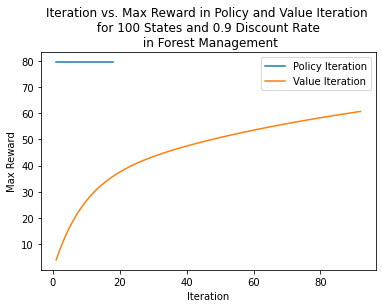

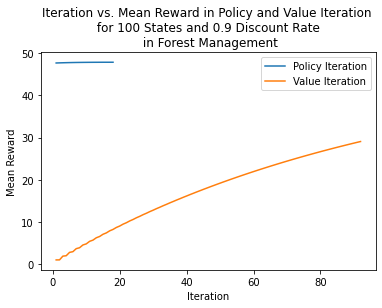

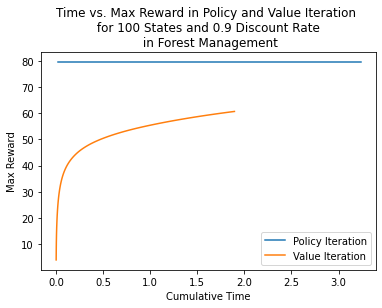

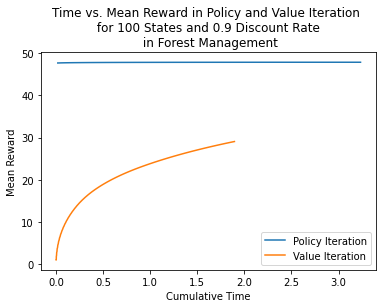

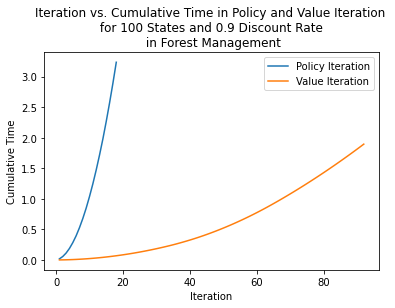

In [252]:
compare_reward(pi_result, vi_result, 100, .90, "Forest Management")

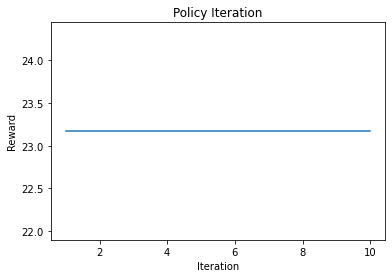

In [238]:
chart_reward_iter(pi_result, "Policy Iteration")

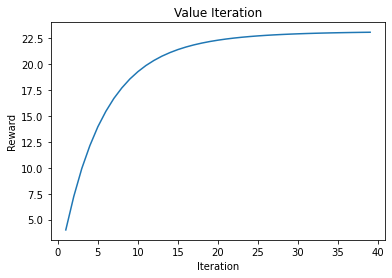

In [239]:
chart_reward_iter(vi_result, "Value Iteration")

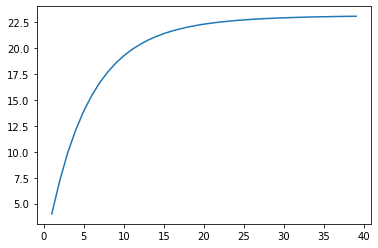

In [240]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Reward'])
    
plt.plot(iter_list, result_list)
plt.show()

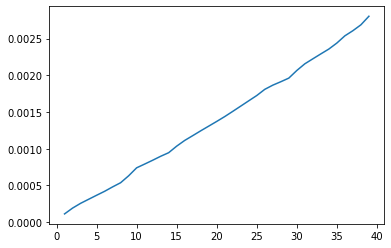

In [241]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

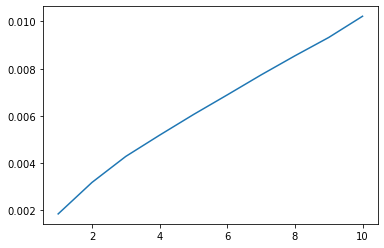

In [242]:
iter_list = []
result_list = []

for i in range(0, len(pi_result)):
    iter_list.append(pi_result[i]['Iteration'])
    result_list.append(pi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

#### How many iterations does it take to converge? 


In [243]:
print("Policy Iteration", pi_result[-1]['Iteration'])
print("Value Iteration", vi_result[-1]['Iteration'])

Policy Iteration 10
Value Iteration 39


#### Which one converges faster?

In [244]:
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))

time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))


Policy Iteration Time: 0.06325817108154297
Value Iteration Time: 0.05440640449523926


#### How did you choose to define convergence?

The defaults 

#### Do they converge to the same answer?

In [245]:
vi.policy == pi.policy

True

#### Which converged to a higher reward?

In [246]:
print("Policy Iteration", pi_result[-1]['Reward'])
print("Value Iteration", vi_result[-1]['Reward'])

Policy Iteration 23.172433847048566
Value Iteration 23.089675091923866


#### How did the number of states affect things, if at all?

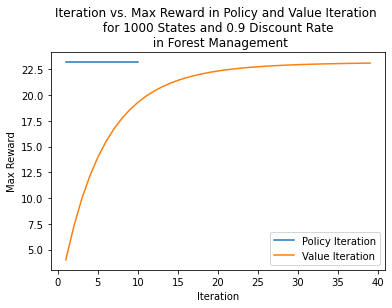

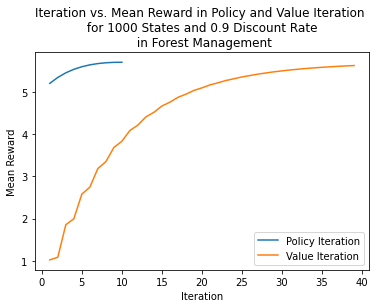

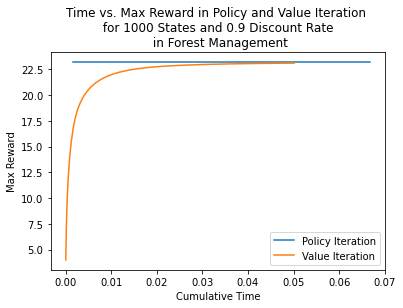

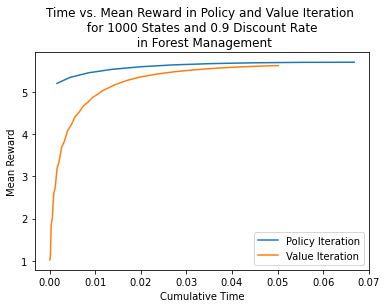

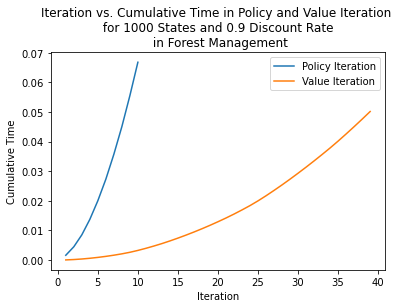

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 0.06680512428283691
Value Iteration Time: 0.05016613006591797
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.704639509766346
Value Iteration: 5.626418022627985
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
How did the number of states affect things, if at all?


In [253]:
P, R = hiive.mdptoolbox.example.forest(S = 100, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(transitions = P, reward = R, gamma = 0.9)
#pi = hiive.mdptoolbox.mdp.PolicyIterationModified(transitions = P, reward = R, gamma = 0.9, epsilon = .1)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 1000, 0.9, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

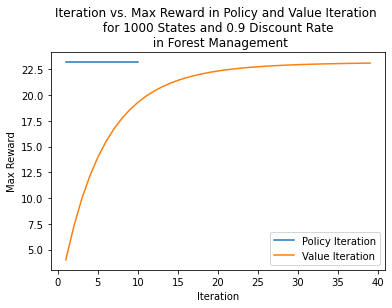

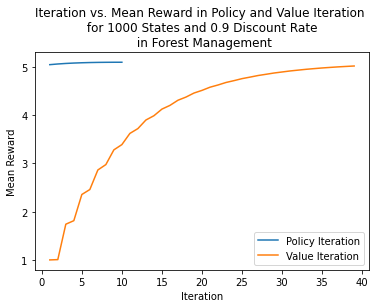

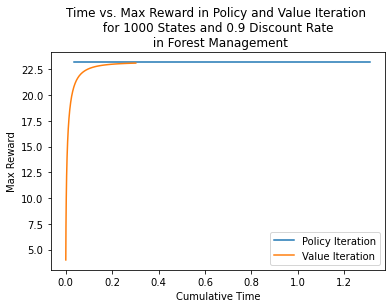

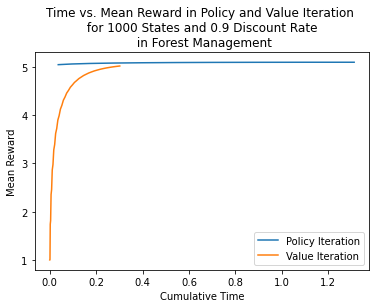

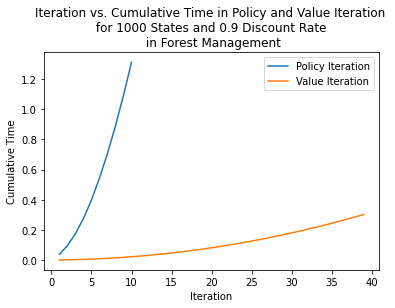

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 1.311919927597046
Value Iteration Time: 0.30191469192504883
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.095325829429674
Value Iteration: 5.017559559264563
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
Which has less error??
Policy Iteration: 1.7763568394002505e-15
Value Iteration: 0.0013319585461291084
How did the number of states affect things, if at all?


In [281]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 1000, 0.9, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("Which has less error??")
print("Policy Iteration:", pi_result[-1]['Error'])
print("Value Iteration:", vi_result[-1]['Error'])

print("How did the number of states affect things, if at all?")

#print("Policy")
#print(pi.policy)

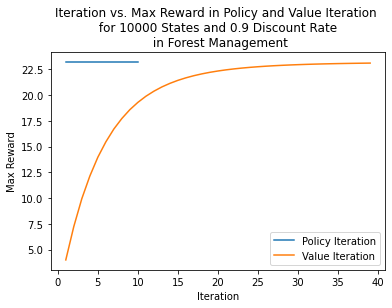

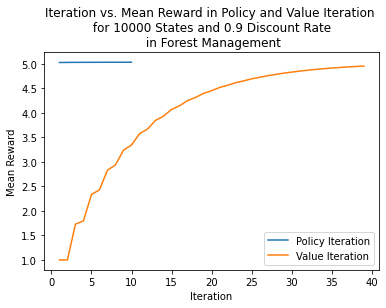

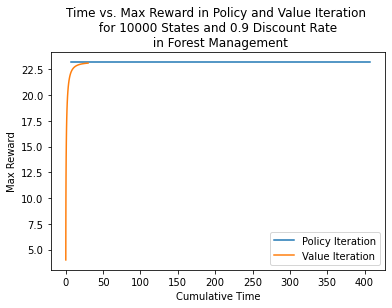

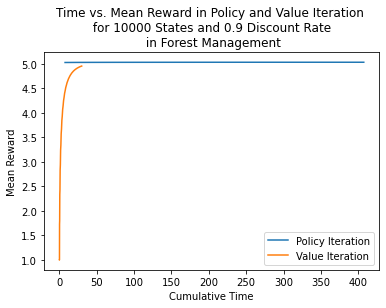

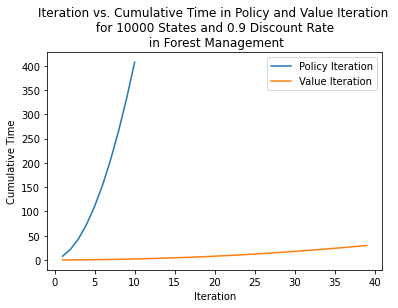

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 407.4442799091339
Value Iteration Time: 29.841048002243042
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.0343944613960065
Value Iteration: 4.956673712928221
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
How did the number of states affect things, if at all?


In [257]:
P, R = hiive.mdptoolbox.example.forest(S = 10000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 10000, 0.9, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

#### Use Base Case of 1000 States, Build up Dictionary for Parameter Tuning

In [271]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

learning_rates = np.arange(0.90, 1.0, 0.01)

pi_LR_dict_FM = {
    'LR' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
vi_LR_dict_FM = {
    'LR' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
for LR in learning_rates:
    
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R, LR)
    pi_result = pi.run()
   
    vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, LR)
    vi_result = vi.run()
    
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, LR)
    ql_result = ql.run()
    
    pi_iter_list = []
    pi_reward_list = []
    pi_mean_v_list = []
    pi_max_v_list = []
    pi_error_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_mean_v_list = []
    vi_max_v_list = []
    vi_error_list = []
    vi_time_list = []

    for i in range(0, len(pi_result)):
        pi_iter_list.append(pi_result[i]['Iteration'])
        pi_reward_list.append(pi_result[i]['Reward'])
        pi_mean_v_list.append(pi_result[i]['Mean V'])
        pi_max_v_list.append(pi_result[i]['Max V'])
        pi_error_list.append(pi_result[i]['Error'])
        pi_time_list.append(pi_result[i]['Time'])
        
    
    for i in range(0, len(vi_result)):
        vi_iter_list.append(vi_result[i]['Iteration'])
        vi_reward_list.append(vi_result[i]['Reward'])
        vi_mean_v_list.append(vi_result[i]['Mean V'])
        vi_max_v_list.append(vi_result[i]['Max V'])
        vi_error_list.append(vi_result[i]['Error'])
        vi_time_list.append(vi_result[i]['Time'])
    
    pi_LR_dict_FM['LR'].append(LR)
    pi_LR_dict_FM['Iteration'].append(pi_iter_list)
    pi_LR_dict_FM['rewards'].append(pi_reward_list)
    pi_LR_dict_FM['Mean V'].append(pi_mean_v_list)
    pi_LR_dict_FM['Max V'].append(pi_max_v_list)
    pi_LR_dict_FM['Error'].append(pi_error_list)
    pi_LR_dict_FM['Time'].append(pi_time_list)
    
    
    vi_LR_dict_FM['LR'].append(LR)
    vi_LR_dict_FM['Iteration'].append(vi_iter_list)
    vi_LR_dict_FM['rewards'].append(vi_reward_list)
    vi_LR_dict_FM['Mean V'].append(vi_mean_v_list)
    vi_LR_dict_FM['Max V'].append(vi_max_v_list)
    vi_LR_dict_FM['Error'].append(vi_error_list)
    vi_LR_dict_FM['Time'].append(vi_time_list)
    
    

Policy Iteration

In [261]:
def plot_parameter_tuning(results, hyperparam, x_var, y_var, title):
    
    for i in range(0, len(results[hyperparam])):
        label = results[hyperparam][i]
        label = np.around(label, 2)
        label = '{:.1%}'.format(label)
        
        x = results[x_var][i]
        y = results[y_var][i]
        if y_var = 
        plt.plot(x, y, label = label)

    plt.title("The Effect of " + hyperparam + " on " + y_var + " over " + x_var +"\n" + title)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title = 'Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', fancybox=True)
    plt.show()


[0.03923392295837402, 0.06190991401672363, 0.0839078426361084, 0.10461783409118652, 0.12708282470703125, 0.1449568271636963, 0.16317272186279297, 0.1809368133544922, 0.1981368064880371, 0.21540188789367676]
[0.03923392295837402, 0.10114383697509766, 0.18505167961120605, 0.2896695137023926, 0.41675233840942383, 0.5617091655731201, 0.7248818874359131, 0.9058187007904053, 1.1039555072784424, 1.3193573951721191]
[0.019649982452392578, 0.03905916213989258, 0.060485124588012695, 0.08043789863586426, 0.1011209487915039, 0.12232589721679688, 0.14383697509765625, 0.16176509857177734, 0.17923402786254883, 0.19698596000671387]
[0.019649982452392578, 0.058709144592285156, 0.11919426918029785, 0.1996321678161621, 0.300753116607666, 0.4230790138244629, 0.5669159889221191, 0.7286810874938965, 0.9079151153564453, 1.1049010753631592]
[0.020062923431396484, 0.038700103759765625, 0.05952930450439453, 0.07897019386291504, 0.09933304786682129, 0.11892819404602051, 0.13957595825195312, 0.1598830223083496, 0

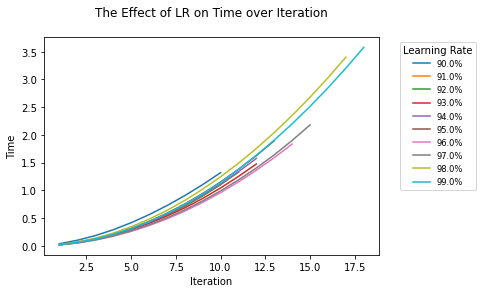

In [300]:
# vi_cumsum_list = list(accumulate(vi_time_list))
for i in range(0, len(pi_LR_dict_FM["LR"])):
    label = pi_LR_dict_FM["LR"][i]
    label = np.around(label, 2)
    label = '{:.1%}'.format(label)

    x = pi_LR_dict_FM["Iteration"][i]
    y = pi_LR_dict_FM["Time"][i]
    print(y)
    y2 = list(accumulate(y))
    print(y2)
    plt.plot(x, y2, label = label)

plt.title("The Effect of " + "LR" + " on " + "Time" + " over " + "Iteration" +"\n" )
plt.xlabel("Iteration")
plt.ylabel("Time")
plt.legend(title = 'Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', fancybox=True)
plt.show()

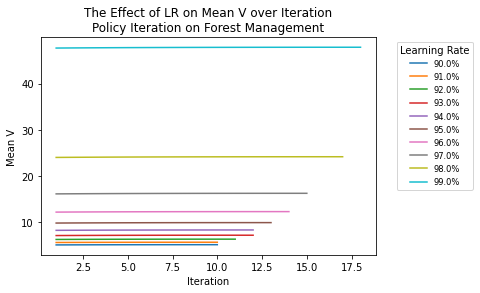

In [272]:
plot_parameter_tuning(pi_LR_dict_FM, "LR", "Iteration", "Mean V", "Policy Iteration on Forest Management")

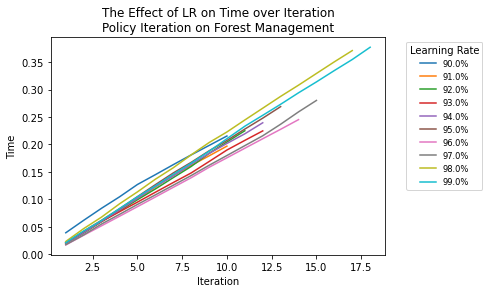

In [273]:
plot_parameter_tuning(pi_LR_dict_FM, "LR", "Iteration", "Time", "Policy Iteration on Forest Management")

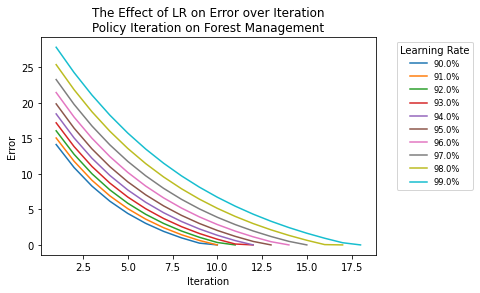

In [274]:
plot_parameter_tuning(pi_LR_dict_FM, "LR", "Iteration", "Error", "Policy Iteration on Forest Management")

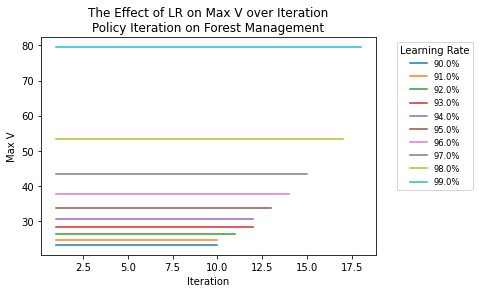

In [275]:
plot_parameter_tuning(pi_LR_dict_FM, "LR", "Iteration", "Max V", "Policy Iteration on Forest Management")

Value Iteration

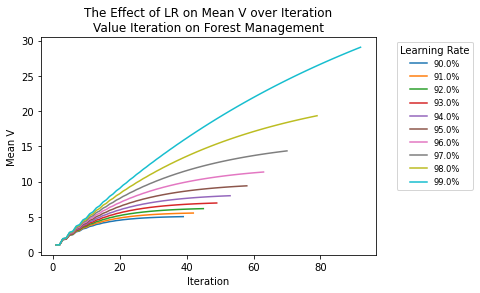

In [287]:
plot_parameter_tuning(vi_LR_dict_FM, "LR", "Iteration", "Mean V", "Value Iteration on Forest Management")

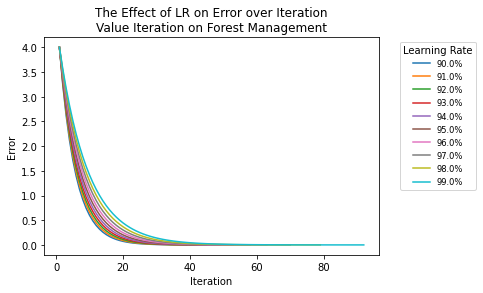

In [277]:
plot_parameter_tuning(vi_LR_dict_FM, "LR", "Iteration", "Error", "Value Iteration on Forest Management")

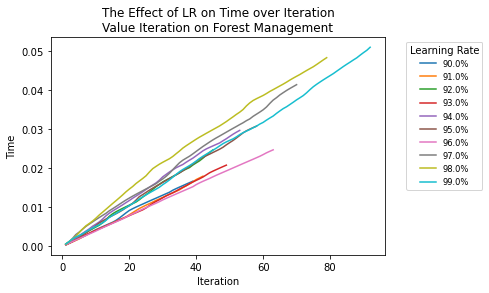

In [278]:
plot_parameter_tuning(vi_LR_dict_FM, "LR", "Iteration", "Time", "Value Iteration on Forest Management")

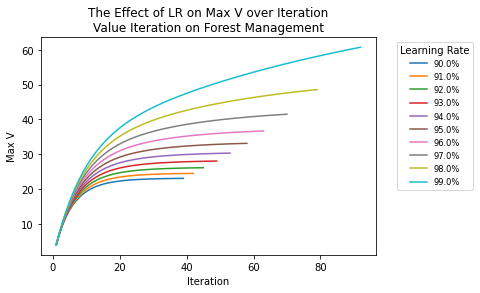

In [279]:
plot_parameter_tuning(vi_LR_dict_FM, "LR", "Iteration", "Max V", "Value Iteration on Forest Management")

### Frozen Lake (Grid World Problem)

Actions: 4
Size: 16


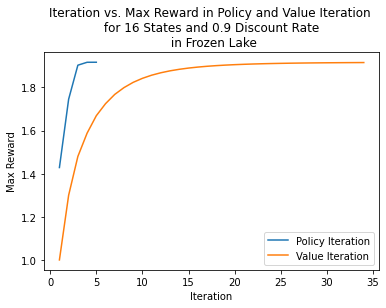

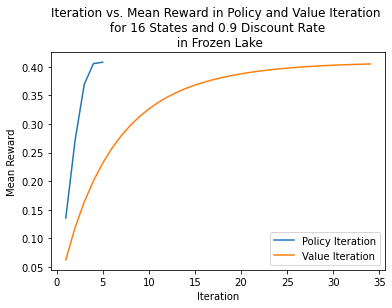

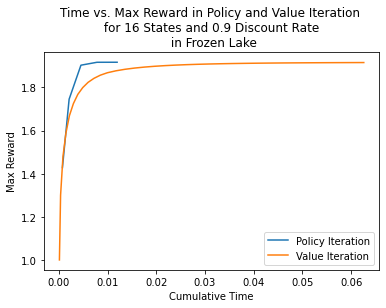

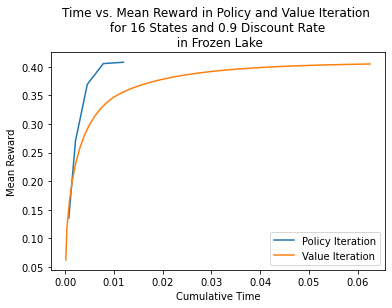

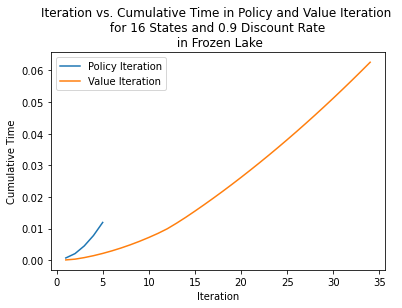

How many iterations does it take to converge?
Policy Iteration: 5
Value Iteration: 34
Which one converges faster? Why?
Policy Iteration Time: 0.011946916580200195
Value Iteration Time: 0.06258344650268555
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 0.4080172982800236
Value Iteration: 0.4049871614918687
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
How did the number of states affect things, if at all?


In [282]:
env = gym.make("FrozenLake-v0")

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, 0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
#print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, 0.9)
vi_result = vi.run()
#print(vi_result)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

####################

compare_reward(pi_result, vi_result, n_states, 0.9, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

Actions: 4
Size: 16


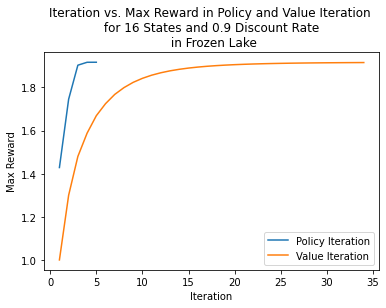

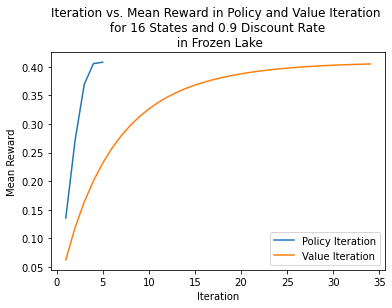

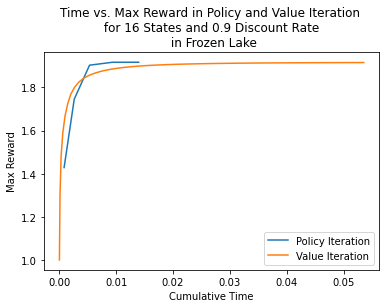

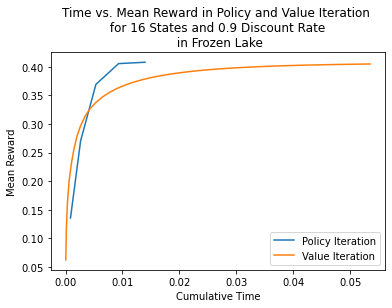

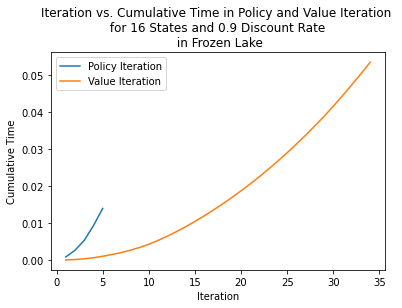

How many iterations does it take to converge?
Policy Iteration: 5
Value Iteration: 34
Which one converges faster? Why?
Policy Iteration Time: 0.013972759246826172
Value Iteration Time: 0.05351376533508301
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 0.4080172982800236
Value Iteration: 0.4049871614918687
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
To what Max Value do they converge?
Policy Iteration: 1.9170604443558334
Value Iteration: 1.9156384309573595
How did the number of states affect things, if at all?


In [283]:
env = gym.make("FrozenLake-v0", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, 0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
#print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, 0.9)
vi_result = vi.run()
#print(vi_result)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

####################

compare_reward(pi_result, vi_result, n_states, 0.9, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

Actions: 4
Size: 64


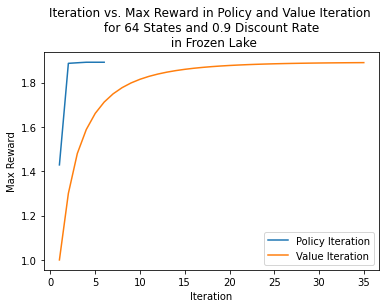

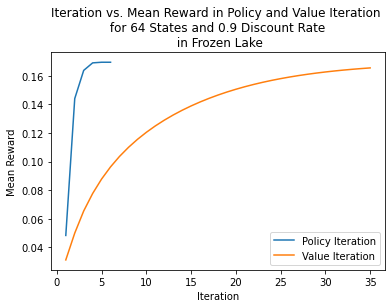

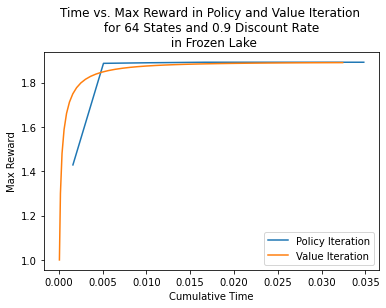

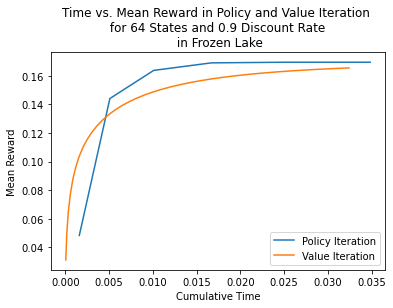

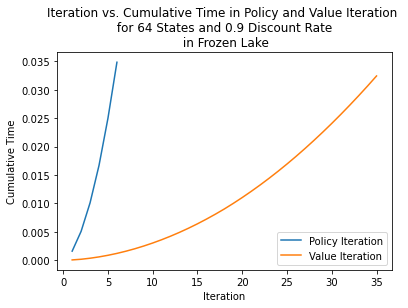

How many iterations does it take to converge?
Policy Iteration: 6
Value Iteration: 35
Which one converges faster? Why?
Policy Iteration Time: 0.03482961654663086
Value Iteration Time: 0.03241753578186035
Do they converge to the same answer?
False
To what Mean Value do they converge?
Policy Iteration: 0.16949846785592668
Value Iteration: 0.16553352000492866
To what Max Value do they converge?
Policy Iteration: 1.8915413942845958
Value Iteration: 1.8898245217404024
To what Max Value do they converge?
Policy Iteration: 1.8915413942845958
Value Iteration: 1.8898245217404024
How did the number of states affect things, if at all?


In [284]:
env = gym.make("FrozenLake-v0", map_name = "8x8", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, 0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
#print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, 0.9)
vi_result = vi.run()
#print(vi_result)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

####################

compare_reward(pi_result, vi_result, n_states, 0.9, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

In [285]:
env = gym.make("FrozenLake-v0", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

learning_rates = np.arange(0.90, 1.0, 0.01)

pi_LR_dict_FL = {
    'LR' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
vi_LR_dict_FL = {
    'LR' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
for LR in learning_rates:
    
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, LR)
    pi_result = pi.run()
   
    vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, LR)
    vi_result = vi.run()
    
    ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, LR)
    ql_result = ql.run()
    
    pi_iter_list = []
    pi_reward_list = []
    pi_mean_v_list = []
    pi_max_v_list = []
    pi_error_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_mean_v_list = []
    vi_max_v_list = []
    vi_error_list = []
    vi_time_list = []

    for i in range(0, len(pi_result)):
        pi_iter_list.append(pi_result[i]['Iteration'])
        pi_reward_list.append(pi_result[i]['Reward'])
        pi_mean_v_list.append(pi_result[i]['Mean V'])
        pi_max_v_list.append(pi_result[i]['Max V'])
        pi_error_list.append(pi_result[i]['Error'])
        pi_time_list.append(pi_result[i]['Time'])
        
    
    for i in range(0, len(vi_result)):
        vi_iter_list.append(vi_result[i]['Iteration'])
        vi_reward_list.append(vi_result[i]['Reward'])
        vi_mean_v_list.append(vi_result[i]['Mean V'])
        vi_max_v_list.append(vi_result[i]['Max V'])
        vi_error_list.append(vi_result[i]['Error'])
        vi_time_list.append(vi_result[i]['Time'])
    
    pi_LR_dict_FL['LR'].append(LR)
    pi_LR_dict_FL['Iteration'].append(pi_iter_list)
    pi_LR_dict_FL['rewards'].append(pi_reward_list)
    pi_LR_dict_FL['Mean V'].append(pi_mean_v_list)
    pi_LR_dict_FL['Max V'].append(pi_max_v_list)
    pi_LR_dict_FL['Error'].append(pi_error_list)
    pi_LR_dict_FL['Time'].append(pi_time_list)
    
    
    vi_LR_dict_FL['LR'].append(LR)
    vi_LR_dict_FL['Iteration'].append(vi_iter_list)
    vi_LR_dict_FL['rewards'].append(vi_reward_list)
    vi_LR_dict_FL['Mean V'].append(vi_mean_v_list)
    vi_LR_dict_FL['Max V'].append(vi_max_v_list)
    vi_LR_dict_FL['Error'].append(vi_error_list)
    vi_LR_dict_FL['Time'].append(vi_time_list)
    
    

Actions: 4
Size: 16


Value Iteration

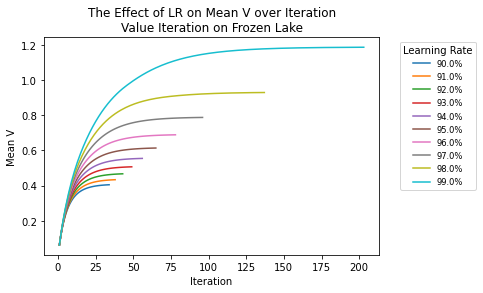

In [288]:
plot_parameter_tuning(vi_LR_dict_FL, "LR", "Iteration", "Mean V", "Value Iteration on Frozen Lake")

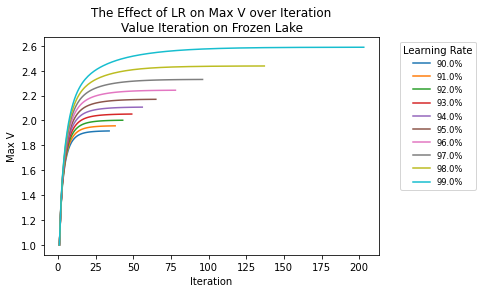

In [289]:
plot_parameter_tuning(vi_LR_dict_FL, "LR", "Iteration", "Max V", "Value Iteration on Frozen Lake")

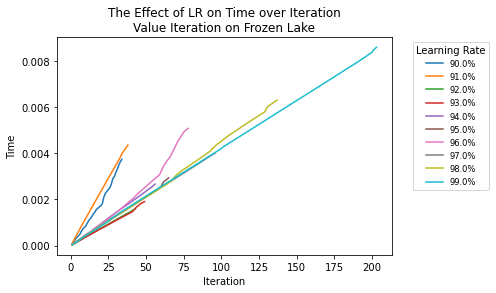

In [290]:
plot_parameter_tuning(vi_LR_dict_FL, "LR", "Iteration", "Time", "Value Iteration on Frozen Lake")

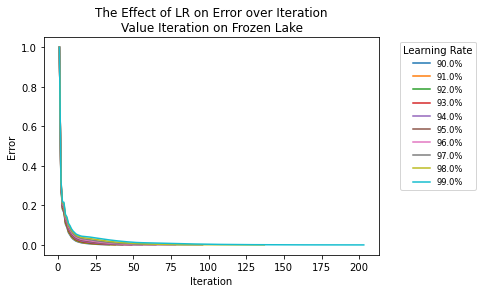

In [291]:
plot_parameter_tuning(vi_LR_dict_FL, "LR", "Iteration", "Error", "Value Iteration on Frozen Lake")

Policy Iteration

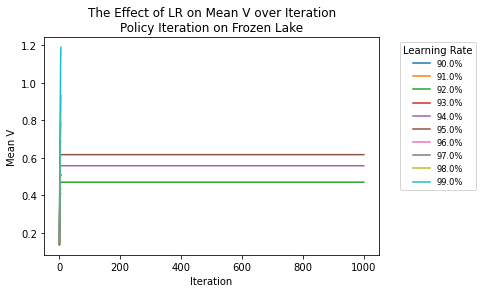

In [292]:
plot_parameter_tuning(pi_LR_dict_FL, "LR", "Iteration", "Mean V", "Policy Iteration on Frozen Lake")

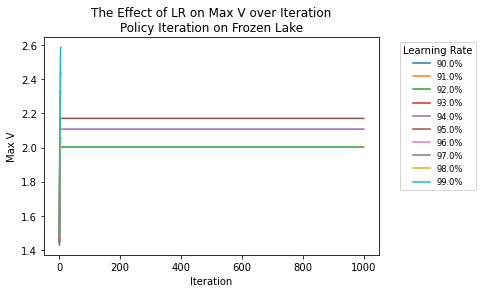

In [293]:
plot_parameter_tuning(pi_LR_dict_FL, "LR", "Iteration", "Max V", "Policy Iteration on Frozen Lake")

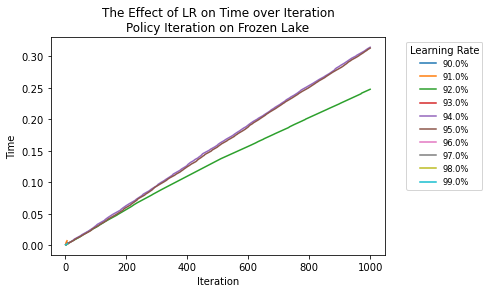

In [294]:
plot_parameter_tuning(pi_LR_dict_FL, "LR", "Iteration", "Time", "Policy Iteration on Frozen Lake")

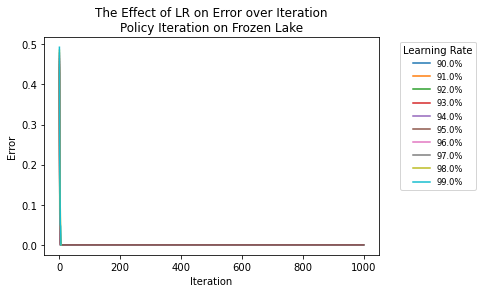

In [295]:
plot_parameter_tuning(pi_LR_dict_FL, "LR", "Iteration", "Error", "Policy Iteration on Frozen Lake")